# Stochastic, Batch, & Mini Gradient Descent

by Maia Rosengarten <br/>
Summer 2017

In [2]:
import matplotlib
import numpy as np
from numpy import linalg as LA
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math
import scipy as sp
from scipy.stats import logistic as sig

np.set_printoptions(threshold=np.nan)
from scipy import io
import sklearn
from sklearn.preprocessing import normalize
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline

In [4]:
def computeCost(X, y, w, regConst):
    prob = sp.special.expit(np.dot(X, w))
    ret = 1/X.shape[0] * (regConst * np.linalg.norm(w)**2) - (vec(y).T.dot(np.log(prob + 0.000001)) + (1-vec(y)).T.dot(np.log(1 - prob + 0.000001)))
    return arr(ret)

In [5]:
def computeSGDGradient(X,  y, w, regConst, i):
    n = X.shape[0]
    prob = sp.special.expit(X[i].T.dot(w))
    ret =  (2 * regConst * w) - (vec(y[i] - prob) * vec(X[i]))  
    return ret

In [6]:
def computeBatchGradient(X, y, w, regConst, prob):
    n = X.shape[0]
    y = vec(y)
    w = vec(w)
    prob = vec(prob)
    ret= (2 * regConst * w) - (X.T.dot(y-prob))
    return ret

In [34]:
def arr(vec): # 1 by d --> (d, )
    return vec.flatten()

In [35]:
def vec(arr): # d b 1 --> (d, 1)
    return arr.reshape((arr.shape[0], 1))

In [9]:
def computeStochGradientDescent(X, y, alpha, regConst, numIterations, dec):
    '''Computes stochastic gradient descent
    Args: 
        X (ndarray) - training data
        y (ndarray) - training labels
        alpha (int) - learning rate
        precision (int) - used for termination condition
        numFeat (int) - number of features
    Returns updated weight vector and lst of costs per iteration
    ''' 
    w = np.zeros((X.shape[1], 1))
    costs = [0 for i in range(numIterations)]
    for i in range(numIterations):
        ran = np.random.randint(0, X.shape[0])
        costs[i] = computeCost(X, y, w, regConst)[0] 
        w = w - alpha * computeSGDGradient(X,  y, w, regConst, ran)
        if dec==True and i!=0:
            alpha = 1/(.001 + i)
    return w, costs

In [10]:
def computeBatchGradientDescent(X, y, alpha, regConst, numIterations):
    '''
        Computes batch gradient descent
        Args: 
            X (ndarray) - training data
            y (ndarray) - training labels
            alpha (int) - learning rate
            regConst (int) - lambda parameter to weight l2 regularization term
            precision (int) - used for termination condition
            numFeat (int) - number of features
        Returns updated weight vector and number of iterations
    ''' 
    w = np.zeros((X.shape[1], 1))
    costs = [0 for i in range(numIterations)]
    for i in range(numIterations):
        costs[i] = computeCost(X, y, w, regConst)[0]
        w -= alpha * ((2 * regConst * w) - (np.dot(X.T, vec(y)-np.reshape(sp.special.expit(np.dot(X, w)), (X.shape[0], 1)))))
    return w, costs

In [11]:
def plotCostFN(costs):
    '''
        Plots cost function as a function of number of iterations
        Args:
            costs (ndarray) - lst of costs per iteration of gradient descent
    '''
   
    iters = [i for i in range(len(costs))]
    plt.plot(iters, costs)
    plt.xscale("log")
    plt.title("Cost Per Iteration of Gradient Descent")
    plt.xlabel('numIterations')
    plt.ylabel('cost')
    plt.show()

In [12]:
def classifyPoints(weightVect, data):
    '''
        Given data, computes sigmoid to approximate likelihood of being in class 1. If greater than 0.5->class1, else class0
    
    '''
    predictions = [0 for i in range(data.shape[0])]
    for x in range(data.shape[0]):
        prob = sp.special.expit(vec(data[x]).T.dot(weightVect))
        if prob > 0.5:
            predictions[x] = 1
    return predictions

In [13]:
def computeAcc(predictions, validY):
    '''
        Given predicted labels and valid labels, compute error rate
    '''
    return acc(validY, predictions)   

In [14]:
def generateCsv(aryPredictions, strCsvName):
    '''
    Writes predictions of testSet to csv file
    Args:
        aryPredictions (ndarray) - (nx1)-array of predictions given size n test (or valid) set
        strCsvName (str) - name of csv file to write to
    '''
    with open(strCsvName + '.csv', 'w') as csvfile:
        writer = csv.writer(csvfile)
        for i in range(len(aryPredictions)):
            writer.writerow([i, aryPredictions[i]])
    csvfile.close()

# Problem 1.4

In [147]:
X = np.array([[0, 3, 1], [1, 3, 1], [0, 1, 1], [1, 1, 1]]).reshape(4, 3)
y = np.array([1, 1, 0, 0])
w = np.array([-2, 1, 0]).reshape(3, 1)
lam = 0.07

In [149]:
def computeGradient(lam, w, X, y, s):
    return 2 * lam * w - X.T.dot((vec(y)-vec(s)))

In [150]:
def computeHessian(lam, w, X, y, s):
    probVect = sp.special.expit(X.dot(w))
    D = np.diag(arr(probVect))
    return 2*lam*np.identity(3) - X.T.dot(D).dot(X)

# (a)

In [151]:
s = sp.special.expit(X.dot(w))
print("The value of s before any iterations: \n" + str(s))

The value of s before any iterations: 
[[ 0.95257413]
 [ 0.73105858]
 [ 0.73105858]
 [ 0.26894142]]


# (b)

In [152]:
gradient = computeGradient(lam, w, X, y, s)
hessian = computeHessian(lam, w, X, y, s)
w = w - np.linalg.inv(hessian).dot(gradient)
print("The value of w after 1 iteration: ")
print(w)

The value of w after 1 iteration: 
[[-3.02666766]
 [ 0.16601721]
 [ 2.65629753]]


# (c)

In [153]:
s = sp.special.expit(X.dot(w))
print("The value of s after 1 iteration: \n" + str(s))

The value of s after 1 iteration: 
[[ 0.95907975]
 [ 0.53187708]
 [ 0.94386983]
 [ 0.44908882]]


# (d)

In [154]:
gradient = computeGradient(lam, w, X, y, s)
hessian = computeHessian(lam, w, X, y, s)
w = w - np.linalg.inv(hessian).dot(gradient)
print("The value of w after 2 iterations: ")
print(w)

The value of w after 2 iterations: 
[[-4.99069235]
 [-1.19352621]
 [ 6.72248976]]



# Problem 4

In [17]:
data = sp.io.loadmat('data.mat')

In [61]:
testSet = data['X_test']
trainX = data['X']
trainY = data['y']

testSet = sklearn.preprocessing.normalize(testSet.astype(float))
trainX = sklearn.preprocessing.normalize(trainX.astype(float))

combined = np.hstack([trainX, trainY])
np.random.shuffle(combined)
trainX = combined[:, :-1]
trainY = combined[:, -1]
trainX = np.hstack([trainX, np.array([1] * 6000).reshape(6000,1)])
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=.1, random_state=42)
print("")


# 4.1 Batch Gradient Descent

In [62]:
alpha = .001
regConst = .007
numIterations = 100000

In [63]:
wBatch, costsBatch = computeBatchGradientDescent(trainX, trainY, alpha, regConst, numIterations)

In [64]:
predictionsBatch = classifyPoints(wBatch, validX)
accuracyBatch = accuracy_score(validY, predictionsBatch)
print('Accuracy is ' + str(accuracyBatch * 100) + '%')
print(validY[:20])
print(predictionsBatch[:20])

Accuracy is 94.3333333333%
[ 1.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  1.  0.  0.
  0.  0.]
[1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


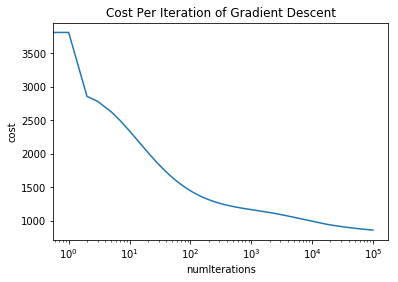

0.943333333333


In [65]:
plotCostFN(costsBatch)
print(accuracyBatch)

In [66]:
# print(costsBatch[0])
# print(costsBatch[100])
# print(costsBatch[1000])
# print(costsBatch[10000-1])

# 4.2 Stochastic Gradient Descent

In [67]:
alpha = .001
regConst = .007
numIterations = 100000


In [68]:
testSet = data['X_test']
trainX = data['X']
trainY = data['y']

trainX = sklearn.preprocessing.normalize(trainX.astype(float))
# testSet = sklearn.preprocessing.normalize(testSet.astype(float))

combined = np.hstack([trainX, trainY])
np.random.shuffle(combined)
trainX = combined[:, :-1]
trainY = combined[:, -1]
trainX = np.hstack([trainX, np.array([1] * 6000).reshape(6000,1)])
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=.1, random_state=42)


In [69]:
wSGD, costsSGD = computeStochGradientDescent(trainX, trainY, alpha, regConst, numIterations, False)

In [70]:
predictionsSGD = classifyPoints(wSGD, validX)
accuracySGD = accuracy_score(validY, predictionsSGD)
print('Accuracy is ' + str(accuracySGD * 100) + '%')


Accuracy is 79.5%


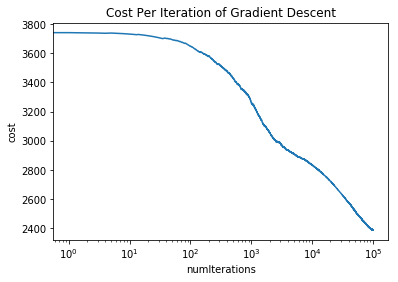

In [71]:
plotCostFN(costsSGD)

# 4.3 SGD Decreasing Epsilon

In [72]:
testSet = data['X_test']
trainX = data['X']
trainY = data['y']

sklearn.preprocessing.normalize(testSet.astype(float))
sklearn.preprocessing.normalize(trainX.astype(float))

combined = np.hstack([trainX, trainY])
np.random.shuffle(combined)
trainX = combined[:, :-1]
trainY = combined[:, -1]
trainX = np.hstack([trainX, np.array([1] * 6000).reshape(6000,1)])
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=.1, random_state=42)
print("")

In [73]:
alpha = .001
regConst = .007
numIterations = 100000


In [74]:
wSGDDec, costsSGDDec = computeStochGradientDescent(trainX, trainY, alpha, regConst, numIterations, True)

In [75]:
predictionsSGDDec = classifyPoints(wSGDDec, validX)
accuracySGDDec = accuracy_score(validY, predictionsSGDDec)

print('Accuracy is ' + str(accuracySGDDec * 100) + '%')

Accuracy is 91.6666666667%


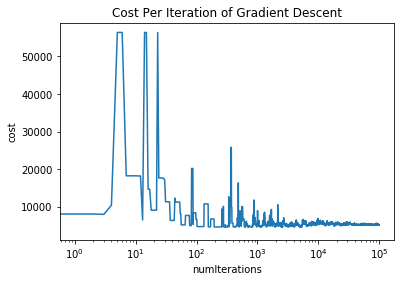

In [76]:
plotCostFN(costsSGDDec)

# 4.4 Kaggle Submission

In [18]:
testSet = data['X_test']
trainX = data['X']
trainY = data['y']
trainX = sklearn.preprocessing.normalize(trainX.astype(float))
testSet = sklearn.preprocessing.normalize(testSet.astype(float))

combined = np.hstack([trainX, trainY])
np.random.shuffle(combined)
trainX = combined[:, :-1]
trainY = combined[:, -1]
trainX = np.hstack([trainX, np.array([1] * trainX.shape[0]).reshape(trainX.shape[0],1)])
testSet = np.hstack([testSet, np.array([1] * testSet.shape[0]).reshape(testSet.shape[0],1)])

# trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=.1, random_state=42)


In [19]:
alpha = .001
regConst = .007
numIterations = 100000


In [22]:
wKaggle, costsKaggle = computeBatchGradientDescent(trainX, trainY, alpha, regConst, numIterations)

predictionsKaggle = classifyPoints(wKaggle, testSet)

generateCsv(predictionsKaggle, 'saturday')

[0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 

# Kaggle Display Name: maiarose


# Kaggle Score: 0.93952

# Process for Choosing Parameters

My process for choosing the regularization parameter lambda and the learning rate for gradient descent was trial and error. I initially chose high lambda (=10) and very low learning rate (0.0001). I tested different combinations of lambda ranging from 0.000001 to 25 and learning rate ranging from 0.0000001 to 0.3 and settled on lambda = 0.007, learning rate = 0.001 since they gave me the highest validation accuracy.

#     Problem 5: Real World Spam Classification

To get a better intuition for the problem, let's suppose the feature space was in $R^2$ so that we can visualize a 2-D graph of the data. The number of spam messages peaks a few minutes before and after midnight, so we can imagine that a graph plotting time on the x-axis (from 12AM to 11:59PM) and number of spam messages on the y-axis would look something like a very flat 'bowl': the middle region (around 12:05 AM to 11:55 PM) would be nearly flat, while there would be spikes at the edges (around 12AM-12:05 and 11:55-11:59). The edges would be classified as "spam" while the center would be classifed as "ham," meaning that a linear decision boundary is not complex enough to classify the points correctly. We would need a quadratic classifier to make a more accurate decision boundary. There are two things Daniel could do: 
1. He could add n polynomial features to his sample points (and n components to his weigth vector) which would create a 'parabolic lifting' of the linear feature space, so that his decision boundary would be polynomial. 2. He could 
2. If Daniel doesn't want to change his features, he could 'squash' the 24-hour period from 12AM to 11:59 PM on the x-axis to a 12-hour period by using the axis |t-12| (this is the absolute value, not the norm). Now the axis goes from 0 to 11. The spam data points will be concentrated near 0, while everything else will be ham. Thus he can use a linear SVM to classify the points.